In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random 

In [21]:
print("shape of X_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of Y_train:",Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_train: (400, 1)


In [11]:
X_train=np.loadtxt('input.csv', delimiter= ',')
Y_train=np.loadtxt('labels.csv',delimiter= ',')

X_test=np.loadtxt('input_test.csv', delimiter=',')
Y_test=np.loadtxt('labels_test.csv', delimiter=',')


In [13]:
X_train[1,:]

array([131., 128., 135., ...,  71.,  96.,  74.])

In [16]:
Y_train[:]

array([0., 0., 0., ..., 1., 1., 1.])

In [17]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [18]:
print("shape of X_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of Y_train:",Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_train: (400, 1)


In [31]:
X_train=X_train/255.0
Y_train=Y_train/255.0
X_test=X_test/255.0
Y_test=Y_test/255.0

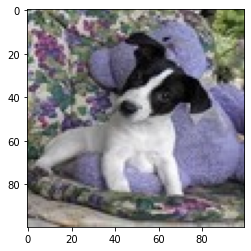

In [41]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[10,:])
plt.show()

In [46]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
''' 
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add( MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model.add( Dense(1,activation='sigmoid'))'''

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adamax',metrics=['accuracy'])

In [69]:
model.fit(X_train,Y_train, epochs=5, batch_size= 64)

Epoch 1/5
32/32 [==============================] - 18s 525ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 18s 569ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 18s 561ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 20s 627ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 19s 587ms/step - loss: 0.0136 - accuracy: 0.5000


In [71]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 81ms/step - loss: 0.0141 - accuracy: 0.5000


[0.014052016660571098, 0.5]

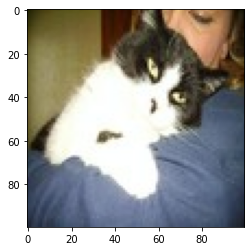

1/1 [==============================] - 0s 40ms/step
[[0.00203416]]
The model says this a: dog


In [72]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'

print('The model says this a:', pred)